# NBA SHOTS classifier

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

First we import our data set and print it 

In [44]:
df = pd.read_csv(r"D:\dataFrames\shot_logs.csv")
df.head()

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,...,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,...,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,NaN,3,...,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,...,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,...,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148


We then want to check if we have any NaN to see how we deal with them 

In [45]:
df.isnull().sum()

GAME_ID                          0
MATCHUP                          0
LOCATION                         0
W                                0
FINAL_MARGIN                     0
SHOT_NUMBER                      0
PERIOD                           0
GAME_CLOCK                       0
SHOT_CLOCK                    5567
DRIBBLES                         0
TOUCH_TIME                       0
SHOT_DIST                        0
PTS_TYPE                         0
SHOT_RESULT                      0
CLOSEST_DEFENDER                 0
CLOSEST_DEFENDER_PLAYER_ID       0
CLOSE_DEF_DIST                   0
FGM                              0
PTS                              0
player_name                      0
player_id                        0
dtype: int64

We can see that all of our NaN are in the SHOT_CLOCK column so we will change it to 0 cause there was no time left on the clock 

In [46]:
df = df.fillna(df.SHOT_CLOCK.mean())
df.isnull().sum()

GAME_ID                       0
MATCHUP                       0
LOCATION                      0
W                             0
FINAL_MARGIN                  0
SHOT_NUMBER                   0
PERIOD                        0
GAME_CLOCK                    0
SHOT_CLOCK                    0
DRIBBLES                      0
TOUCH_TIME                    0
SHOT_DIST                     0
PTS_TYPE                      0
SHOT_RESULT                   0
CLOSEST_DEFENDER              0
CLOSEST_DEFENDER_PLAYER_ID    0
CLOSE_DEF_DIST                0
FGM                           0
PTS                           0
player_name                   0
player_id                     0
dtype: int64

Let us get the data information

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128069 entries, 0 to 128068
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   GAME_ID                     128069 non-null  int64  
 1   MATCHUP                     128069 non-null  object 
 2   LOCATION                    128069 non-null  object 
 3   W                           128069 non-null  object 
 4   FINAL_MARGIN                128069 non-null  int64  
 5   SHOT_NUMBER                 128069 non-null  int64  
 6   PERIOD                      128069 non-null  int64  
 7   GAME_CLOCK                  128069 non-null  object 
 8   SHOT_CLOCK                  128069 non-null  float64
 9   DRIBBLES                    128069 non-null  int64  
 10  TOUCH_TIME                  128069 non-null  float64
 11  SHOT_DIST                   128069 non-null  float64
 12  PTS_TYPE                    128069 non-null  int64  
 13  SHOT_RESULT   

For classification we need a binary value so we will replace missed shots with 0 and made shots with 1

In [48]:
df = df.replace(["missed","made"],[0,1])
df.head()

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.800000,2,...,7.7,2,1,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.400000,0,...,28.2,3,0,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,12.453344,3,...,10.1,2,0,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.300000,2,...,17.2,2,0,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.900000,2,...,3.7,2,0,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128069 entries, 0 to 128068
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   GAME_ID                     128069 non-null  int64  
 1   MATCHUP                     128069 non-null  object 
 2   LOCATION                    128069 non-null  object 
 3   W                           128069 non-null  object 
 4   FINAL_MARGIN                128069 non-null  int64  
 5   SHOT_NUMBER                 128069 non-null  int64  
 6   PERIOD                      128069 non-null  int64  
 7   GAME_CLOCK                  128069 non-null  object 
 8   SHOT_CLOCK                  128069 non-null  float64
 9   DRIBBLES                    128069 non-null  int64  
 10  TOUCH_TIME                  128069 non-null  float64
 11  SHOT_DIST                   128069 non-null  float64
 12  PTS_TYPE                    128069 non-null  int64  
 13  SHOT_RESULT   

Deleting all the columns that are not usefull when trying to determine whether a shot went in or not

In [51]:
df = df.drop(columns = ["SHOT_NUMBER","MATCHUP","player_name" ,"player_id", "CLOSEST_DEFENDER","CLOSEST_DEFENDER_PLAYER_ID", "W", "FINAL_MARGIN","FGM","PTS"])
df.head()

,GAME_ID,LOCATION,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSE_DEF_DIST
0,21400899,A,1,1:09,10.800000,2,1.9,7.7,2,1,1.3
1,21400899,A,1,0:14,3.400000,0,0.8,28.2,3,0,6.1
2,21400899,A,1,0:00,12.453344,3,2.7,10.1,2,0,0.9
3,21400899,A,2,11:47,10.300000,2,1.9,17.2,2,0,3.4
4,21400899,A,2,10:34,10.900000,2,2.7,3.7,2,0,1.1


In [52]:
df.describe()

,GAME_ID,PERIOD,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSE_DEF_DIST
count,1.280690e+05,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000
mean,2.140045e+07,2.469427,12.453344,2.023355,2.765901,13.571504,2.264670,0.452139,4.123015
std,2.578773e+02,1.139919,5.636611,3.477760,3.043682,8.888964,0.441159,0.497706,2.756446
min,2.140000e+07,1.000000,0.000000,0.000000,-163.600000,0.000000,2.000000,0.000000,0.000000
25%,2.140023e+07,1.000000,8.400000,0.000000,0.900000,4.700000,2.000000,0.000000,2.300000
50%,2.140045e+07,2.000000,12.453344,1.000000,1.600000,13.700000,2.000000,0.000000,3.700000
75%,2.140067e+07,3.000000,16.400000,2.000000,3.700000,22.500000,3.000000,1.000000,5.300000
max,2.140091e+07,7.000000,24.000000,32.000000,24.900000,47.200000,3.000000,1.000000,53.200000


we can see that the Touch_time column has a min value that is negative which is not possible

In [53]:
negative = df.loc[df["TOUCH_TIME"]<0]
negative.shape

(312, 11)

In [54]:
#we can see that we have 312 values that are negative, we will assign touch_time.mean() for the negative values
change_to = df.TOUCH_TIME.mean()
df.loc[(df.TOUCH_TIME < 0),'TOUCH_TIME'] = change_to
df.head()

,GAME_ID,LOCATION,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSE_DEF_DIST
0,21400899,A,1,1:09,10.800000,2,1.9,7.7,2,1,1.3
1,21400899,A,1,0:14,3.400000,0,0.8,28.2,3,0,6.1
2,21400899,A,1,0:00,12.453344,3,2.7,10.1,2,0,0.9
3,21400899,A,2,11:47,10.300000,2,1.9,17.2,2,0,3.4
4,21400899,A,2,10:34,10.900000,2,2.7,3.7,2,0,1.1


In [55]:
df.describe()

,GAME_ID,PERIOD,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSE_DEF_DIST
count,1.280690e+05,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000
mean,2.140045e+07,2.469427,12.453344,2.023355,2.778696,13.571504,2.264670,0.452139,4.123015
std,2.578773e+02,1.139919,5.636611,3.477760,2.983555,8.888964,0.441159,0.497706,2.756446
min,2.140000e+07,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,2.140023e+07,1.000000,8.400000,0.000000,0.900000,4.700000,2.000000,0.000000,2.300000
50%,2.140045e+07,2.000000,12.453344,1.000000,1.600000,13.700000,2.000000,0.000000,3.700000
75%,2.140067e+07,3.000000,16.400000,2.000000,3.700000,22.500000,3.000000,1.000000,5.300000
max,2.140091e+07,7.000000,24.000000,32.000000,24.900000,47.200000,3.000000,1.000000,53.200000


we will draw some stats to see if maybe we can drop a certin column

In [56]:
shots_home = df.loc[df["LOCATION"] == "H"]
shots_away = df.loc[df["LOCATION"] == "A"]
shots_home_made = shots_home.loc[shots_home["SHOT_RESULT"] == 1]
shots_away_made = shots_away.loc[shots_away["SHOT_RESULT"] == 1]
home_precentge = (shots_home_made.shape[0])/ shots_home.shape[0]
away_precentge = (shots_away_made.shape[0])/ shots_away.shape[0]
print(home_precentge)
print(away_precentge)
difference = abs(home_precentge - away_precentge)
print(difference)

0.45617355397753934
0.4481172526701489
0.008056301307390434


as we see there is not alot of difference between home and away games so we will drop this column ,
we will check the same for other columns that have a set number of options(period, shot type)

Text(0.5, 1.0, '% of shots made according to quarter')

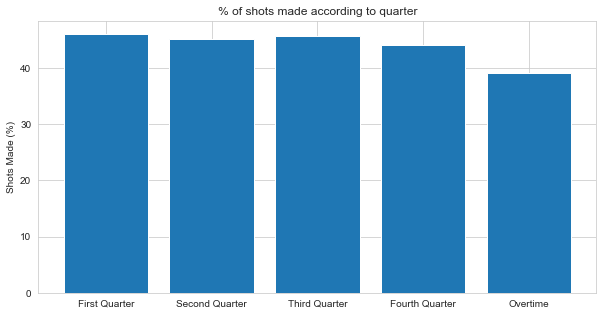

In [57]:
df = df.drop(columns = ["LOCATION"])
first_q = df.loc[df['PERIOD'] == 1]
second_q = df.loc[df['PERIOD'] == 2]
third_q = df.loc[df['PERIOD'] == 3]
fourth_q = df.loc[df['PERIOD'] == 4]
OT = df.loc[df['PERIOD'] == 5]
first_q_made = first_q.loc[first_q['SHOT_RESULT'] == 1]
second_q_made = second_q.loc[second_q['SHOT_RESULT'] == 1]
third_q_made = third_q.loc[third_q['SHOT_RESULT'] == 1]
fourth_q_made  = fourth_q .loc[fourth_q ['SHOT_RESULT'] == 1]
OT_made = OT.loc[OT['SHOT_RESULT'] == 1]
first_precentge = (first_q_made.shape[0])/(first_q.shape[0])
second_precentge = (second_q_made.shape[0])/(second_q.shape[0])
third_precentge = (third_q_made.shape[0])/(third_q.shape[0])
fourth_precentge = (fourth_q_made.shape[0])/(fourth_q.shape[0])
OT_precentge = (OT_made.shape[0])/(OT.shape[0])
precentege = [first_precentge*100,second_precentge*100,third_precentge*100,fourth_precentge*100,OT_precentge*100]
plt.figure(figsize = [10,5])
Quarter = ['First Quarter','Second Quarter','Third Quarter','Fourth Quarter','Overtime']
plt.bar(Quarter, height = precentege)
plt.ylabel("Shots Made (%)")
plt.title("% of shots made according to quarter")

as we can see, there is a big drop in the shooting precentge the later into the game it was shot, so we will keep those columns

Text(0.5, 1.0, '% of shots made according to type')

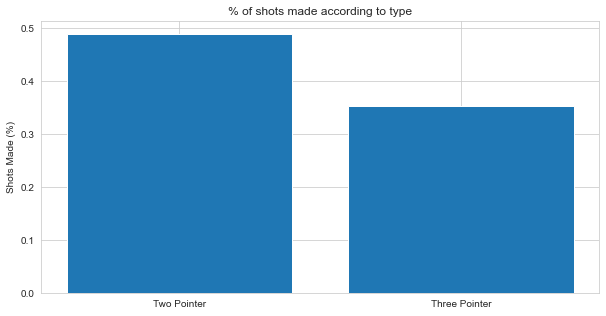

In [58]:
two_pointers = df.loc[df['PTS_TYPE'] == 2]
three_pointers = df.loc[df['PTS_TYPE'] == 3]
two_pointers_made = two_pointers.loc[two_pointers['SHOT_RESULT'] == 1]
three_pointers_made = three_pointers.loc[three_pointers['SHOT_RESULT'] == 1]
twos_precentege =(two_pointers_made.shape[0])/(two_pointers.shape[0]) 
threes_precentege =(three_pointers_made.shape[0])/(three_pointers.shape[0]) 
precentege = [twos_precentege,threes_precentege]
plt.figure(figsize = [10,5])
type_shot = ['Two Pointer','Three Pointer']
plt.bar(type_shot, height = precentege)
plt.ylabel("Shots Made (%)")
plt.title("% of shots made according to type")

there is a huge diffrence between 3 point % and 2 point % so we wont drop those columns either

from what i have read, a player is defined as closely guarded when there is a defender which is less the 6 feet away from him, so we will change data acordibgly, if a player shoots while he is closely guarded we will classify that as 1, and if he is not closely guarded we will classify it as 0, and rename it accordingly

In [59]:
df.loc[(df.CLOSE_DEF_DIST < 6),'CLOSE_DEF_DIST']= int(1)
df.loc[(df.CLOSE_DEF_DIST >= 6),'CLOSE_DEF_DIST']= int(0)
df = df.rename(columns = {"CLOSE_DEF_DIST": "CLOSELY_GUARDED"})
df.head()

,GAME_ID,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSELY_GUARDED
0,21400899,1,1:09,10.800000,2,1.9,7.7,2,1,1.0
1,21400899,1,0:14,3.400000,0,0.8,28.2,3,0,0.0
2,21400899,1,0:00,12.453344,3,2.7,10.1,2,0,1.0
3,21400899,2,11:47,10.300000,2,1.9,17.2,2,0,1.0
4,21400899,2,10:34,10.900000,2,2.7,3.7,2,0,1.0


the difference in percentage is 0.678199706718613


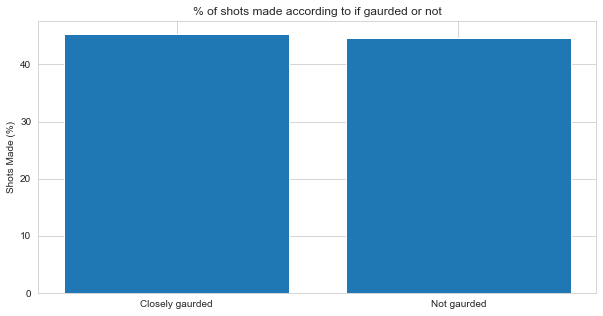

In [60]:
shots_gaurded = df.loc[df['CLOSELY_GUARDED'] == 1]
not_gaurded = df.loc[df['CLOSELY_GUARDED'] == 0]
gaurded_per = shots_gaurded.loc[shots_gaurded['SHOT_RESULT'] == 1].shape[0]/shots_gaurded.shape[0]
not_gaurded_per = not_gaurded.loc[not_gaurded['SHOT_RESULT'] == 1].shape[0]/not_gaurded.shape[0]
precentege = [gaurded_per *100 ,not_gaurded_per * 100]
plt.figure(figsize = [10,5])
type_shot = ['Closely gaurded','Not gaurded']
plt.bar(type_shot, height = precentege)
plt.ylabel("Shots Made (%)")
plt.title("% of shots made according to if gaurded or not")
diff = abs(gaurded_per - not_gaurded_per) * 100
print("the difference in percentage is " + str(diff))

as we can see there is not a lot of difference wheter a player was gaurded or not , so we will drop it before training

next lets check about the time left on the shot clock which goes down from 24 seconds in the nba, according to the internet, you should split it into 4 categories, 0-3 seconds left, 4-8 second left, 9-13 seconds left, 14+ second left

Text(0.5, 1.0, '% Of Shots Made According to time left on the shot clock')

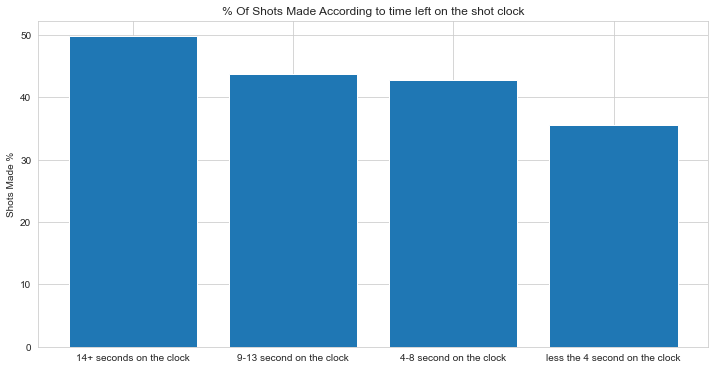

In [61]:
quick_possessions =  df.loc[df['SHOT_CLOCK'] >= 14] # 14+ seconds left
medium_possessions =df.loc[(df['SHOT_CLOCK'] < 14) &(df['SHOT_CLOCK'] >= 9)] # 9-13 seconds left
slow_possessions =  df.loc[(df['SHOT_CLOCK'] < 9) &(df['SHOT_CLOCK'] >= 4)] # 4-8 seconds left
late_possessions =  df.loc[df['SHOT_CLOCK'] < 4] # 0-3 seconds left
quick_possessions_made = quick_possessions.loc[quick_possessions["SHOT_RESULT"] == 1]
medium_possessions_made = medium_possessions.loc[medium_possessions["SHOT_RESULT"] == 1]
slow_possessions_made = slow_possessions.loc[slow_possessions["SHOT_RESULT"] == 1]
late_possessions_made = late_possessions.loc[late_possessions["SHOT_RESULT"] == 1]
quick_percentge = quick_possessions_made.shape[0]/quick_possessions.shape[0]
medium_percentge = medium_possessions_made.shape[0]/medium_possessions.shape[0]
slow_percentge = slow_possessions_made.shape[0]/slow_possessions.shape[0]
late_percentge = late_possessions_made.shape[0]/late_possessions.shape[0]
precentege = [quick_percentge*100,medium_percentge*100,slow_percentge*100,late_percentge*100]
plt.figure(figsize = [12,6])
plt.bar(x=['14+ seconds on the clock', '9-13 second on the clock','4-8 second on the clock','less the 4 second on the clock'], height=precentege)
plt.ylabel("Shots Made %")
plt.title("% Of Shots Made According to time left on the shot clock")

as we see there is a difference between the time on the shot clock left when shooting, so we will keep it, and make more columns to each kind of possesion, to binerize the data between 0 and 1

In [62]:
pos_array = np.zeros(df.shape[0])
for i in range(df.shape[0]):
    if(df.loc[i].SHOT_CLOCK >= 14):
        pos_array[i] = 1
df['quick_possession'] =pos_array
pos_array = np.zeros(df.shape[0])
for i in range(df.shape[0]):
    if(df.loc[i].SHOT_CLOCK < 4):
        pos_array[i] = 1
df['late_possesion'] = pos_array
pos_array = np.zeros(df.shape[0])
for i in range(df.shape[0]):
    if((df.loc[i].SHOT_CLOCK < 14) & (df.loc[i].SHOT_CLOCK >= 9)):
        pos_array[i] = 1
df['medium_possession'] = pos_array
pos_array = np.zeros(df.shape[0])
for i in range(df.shape[0]):
    if((df.loc[i].SHOT_CLOCK <9) & (df.loc[i].SHOT_CLOCK >= 4)):
        pos_array[i] = 1
df['slow_possession'] = pos_array

In [63]:
#we will change the GAME_CLOCK columng to time in second so we will be able to use it as well
df.GAME_CLOCK = df.GAME_CLOCK.apply(lambda x: int(x.split(":")[0])*60 + int(x.split(":")[1]))
df.head()

,GAME_ID,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSELY_GUARDED,quick_possession,late_possesion,medium_possession,slow_possession
0,21400899,1,69,10.800000,2,1.9,7.7,2,1,1.0,0.0,0.0,1.0,0.0
1,21400899,1,14,3.400000,0,0.8,28.2,3,0,0.0,0.0,1.0,0.0,0.0
2,21400899,1,0,12.453344,3,2.7,10.1,2,0,1.0,0.0,0.0,1.0,0.0
3,21400899,2,707,10.300000,2,1.9,17.2,2,0,1.0,0.0,0.0,1.0,0.0
4,21400899,2,634,10.900000,2,2.7,3.7,2,0,1.0,0.0,0.0,1.0,0.0


next we will split to shots according to distance from the basket (SHOT_DIST column)

we have 5 categories: 

1. close range shots (0-5 ft from basket)
2. short two's (6-11 ft from basket)
3. mid range (12-17 ft from basket)
4. long two's (18- 23 ft from the basket)
5. three pointers(23+ from the basket)

we can not count the three pointers because we know what is a 3 or not according to the PTS_TYPE column
we will also change the column name from SHOT_DIST to SHOT_TYPE

(array([32317., 22495., 10229., 15161., 21903., 25017.,   614.,   164.,
          120.,    49.]),
 array([ 0.  ,  4.72,  9.44, 14.16, 18.88, 23.6 , 28.32, 33.04, 37.76,
        42.48, 47.2 ]),
 <a list of 10 Patch objects>)

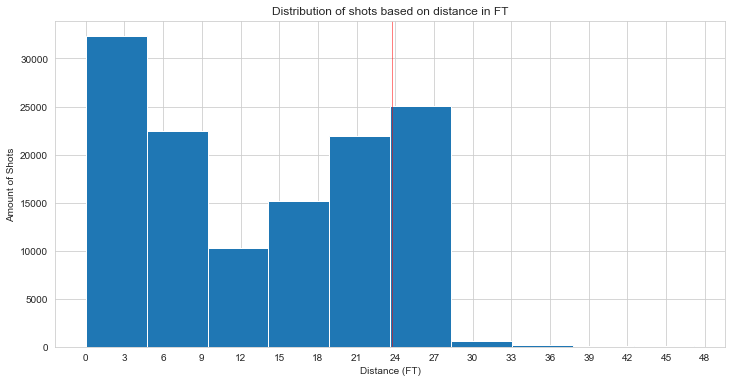

In [64]:
plt.figure(figsize = [12,6])
plt.title("Distribution of shots based on distance in FT")
plt.ylabel("Amount of Shots")
plt.xlabel("Distance (FT)")
plt.axvline(x=23.75, linewidth=0.5, color='r');
xtics = np.arange(0,50,3)
plt.xticks(xtics,xtics)
plt.hist(df.SHOT_DIST)

The red line represents the distance of the 3pt line, so shots to the right of the line are 3 Pointers, and we can we that way more 2 Pointers are taken

In [65]:
shot_array = np.zeros(df.shape[0])
for i in range(df.shape[0]):
    if(df.loc[i].SHOT_DIST <=5):
        shot_array[i] = 1
df['close_two'] =shot_array
shot_array = np.zeros(df.shape[0])
for i in range(df.shape[0]):
    if((df.loc[i].SHOT_DIST >  5) & (df.loc[i].SHOT_DIST <= 11)):
        shot_array[i] = 1
df['short_two'] = shot_array
shot_array= np.zeros(df.shape[0])
for i in range(df.shape[0]):
    if((df.loc[i].SHOT_DIST > 11) & (df.loc[i].SHOT_DIST <= 17)):
        shot_array[i] = 1
df['mid_range_two'] = shot_array
shot_array = np.zeros(df.shape[0])
for i in range(df.shape[0]):
    if((df.loc[i].SHOT_DIST > 17 ) & (df.loc[i].SHOT_DIST <= 23)):
        shot_array[i] = 1
df['long_two'] = shot_array
shot_array = np.zeros(df.shape[0])
for i in range(df.shape[0]):
    if(df.loc[i].SHOT_DIST > 23 ):
        shot_array[i] = 1
df['three_pointer'] = shot_array
df.head()

,GAME_ID,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSELY_GUARDED,quick_possession,late_possesion,medium_possession,slow_possession,close_two,short_two,mid_range_two,long_two,three_pointer
0,21400899,1,69,10.800000,2,1.9,7.7,2,1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,21400899,1,14,3.400000,0,0.8,28.2,3,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,21400899,1,0,12.453344,3,2.7,10.1,2,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,21400899,2,707,10.300000,2,1.9,17.2,2,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,21400899,2,634,10.900000,2,2.7,3.7,2,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


lets check that every shot has a type we just assignd

In [66]:
check = df.loc[(df.close_two == 0) & (df.short_two == 0) & ( df.mid_range_two ==0) & (df.long_two == 0) & (df.three_pointer ==0)]
check.head()

,GAME_ID,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSELY_GUARDED,quick_possession,late_possesion,medium_possession,slow_possession,close_two,short_two,mid_range_two,long_two,three_pointer


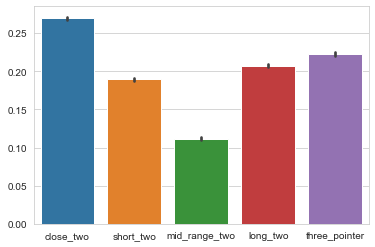

In [67]:
bars= ["close_two","short_two","mid_range_two","long_two","three_pointer"]
ax = sns.barplot(data = df[bars])

Text(0.5, 1.0, '% of shots made based on time left in quarter')

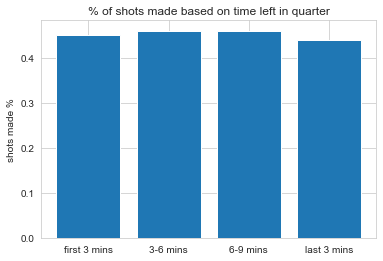

In [69]:
first_q = df.loc[df['GAME_CLOCK'] >= 540]
second_q = df.loc[(df['GAME_CLOCK'] < 540) & (df['GAME_CLOCK'] >= 360)]
third_q = df.loc[(df['GAME_CLOCK'] < 360) & (df['GAME_CLOCK'] >= 180)]
fourth_q = df.loc[(df['GAME_CLOCK'] < 180)]
first_q_per = first_q.loc[first_q['SHOT_RESULT'] == 1].shape[0]/first_q.shape[0]
second_q_per = second_q.loc[second_q['SHOT_RESULT'] == 1].shape[0]/second_q.shape[0]
third_q_per = third_q.loc[third_q['SHOT_RESULT'] == 1].shape[0]/third_q.shape[0]
fourth_q_per = fourth_q.loc[df['SHOT_RESULT'] == 1].shape[0]/fourth_q.shape[0]
precentege = [first_q_per,second_q_per,third_q_per,fourth_q_per]
x_bars = ['first 3 mins','3-6 mins','6-9 mins','last 3 mins']
plt.bar(x = x_bars, height = precentege)
plt.ylabel("shots made %")
plt.title("% of shots made based on time left in quarter")

as we see this doesnt change much, so we will drop this column


we can see that it is empty so that means that every shot has a type, next lets drop the shot_dist and shot_clock columns since we categorized it and the PTS_TYPE column

In [70]:
df = df.drop(columns = ["GAME_ID","SHOT_DIST","PTS_TYPE","SHOT_CLOCK","GAME_CLOCK","CLOSELY_GUARDED"])

In [71]:
df.head()

,PERIOD,DRIBBLES,TOUCH_TIME,SHOT_RESULT,quick_possession,late_possesion,medium_possession,slow_possession,close_two,short_two,mid_range_two,long_two,three_pointer
0,1,2,1.9,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,0,0.8,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,3,2.7,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,2,2,1.9,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2,2,2.7,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [72]:
df.describe()

,PERIOD,DRIBBLES,TOUCH_TIME,SHOT_RESULT,quick_possession,late_possesion,medium_possession,slow_possession,close_two,short_two,mid_range_two,long_two,three_pointer
count,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000
mean,2.469427,2.023355,2.778696,0.452139,0.383223,0.071789,0.341144,0.203843,0.269136,0.189367,0.111627,0.207295,0.222575
std,1.139919,3.477760,2.983555,0.497706,0.486174,0.258140,0.474096,0.402855,0.443513,0.391801,0.314909,0.405370,0.415977
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,1.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,2.000000,3.700000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,7.000000,32.000000,24.900000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


next lets see about dribbels, 0 dribbels means a catch and shoot, so this will be a category, and we will do every 1-10,11-20, 21+ dribbels as well

check we didnt count a shot twice or missed a shot

In [73]:
catch_shot = df.loc[df['DRIBBLES'] == 0]
low_dribbles = df.loc[(df['DRIBBLES'] >=1) & (df['DRIBBLES'] <=10)]
med_dribbles = df.loc[(df['DRIBBLES'] >=11) & (df['DRIBBLES']<= 20)]
high_dribbles = df.loc[df['DRIBBLES'] > 20]
print(catch_shot.shape[0])
print(low_dribbles.shape[0])
print(med_dribbles.shape[0])
print(high_dribbles.shape[0])
print(df.shape[0])
print(catch_shot.shape[0]+low_dribbles.shape[0]+med_dribbles.shape[0]+high_dribbles.shape[0])

63195
59793
4574
507
128069
128069


now lets check the shot % based on amount of dribbles

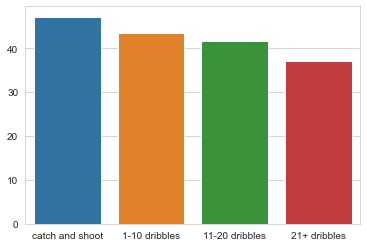

In [74]:
catch_per = catch_shot.loc[catch_shot['SHOT_RESULT'] ==1].shape[0]/catch_shot.shape[0]
low_per = low_dribbles.loc[low_dribbles['SHOT_RESULT'] ==1].shape[0]/low_dribbles.shape[0]
med_per = med_dribbles.loc[med_dribbles['SHOT_RESULT'] ==1].shape[0]/med_dribbles.shape[0]
high_per = high_dribbles.loc[high_dribbles['SHOT_RESULT'] ==1].shape[0]/high_dribbles.shape[0]
per_arr = [catch_per*100,low_per*100,med_per*100,high_per*100]
xlabels = ["catch and shoot","1-10 dribbles","11-20 dribbles","21+ dribbles"]
sns.set_style("whitegrid")
ax = sns.barplot(y = per_arr, x = xlabels)

In [76]:
print(high_per)
print(high_dribbles.shape[0])
print(med_per)
print(med_dribbles.shape[0])
print(low_per)
print(low_dribbles.shape[0])
print(catch_per)
print(catch_shot.shape[0])

0.3708086785009862
507
0.4173589855706165
4574
0.43469971401334606
59793
0.47180947859799033
63195


we can see that as the player dribbles more, there is a bigger chance he will miss, but we also see that 96% of the shots taken were either catch and shoot situations or 1-10 dribbles so the big drop is only for a small amount of percentege of shots so we will remove all the shots with 21+ dribbles since it will move our model to fit these shots, and they represent 
0.4% of our shots

now we will get our data ready to use in the clasifer, first we need to get our target array and then remove the shot_result column

In [91]:
df = df[df.DRIBBLES <= 20]
df.describe()

,PERIOD,DRIBBLES,TOUCH_TIME,SHOT_RESULT,quick_possession,late_possesion,medium_possession,slow_possession,close_two,short_two,mid_range_two,long_two,three_pointer
count,127562.000000,127562.000000,127562.000000,127562.000000,127562.000000,127562.000000,127562.000000,127562.000000,127562.000000,127562.000000,127562.000000,127562.000000,127562.000000
mean,2.468031,1.939614,2.712573,0.452462,0.384746,0.070617,0.341802,0.202835,0.269508,0.189163,0.111608,0.207123,0.222598
std,1.139607,3.217582,2.795472,0.497737,0.486537,0.256184,0.474316,0.402112,0.443706,0.391640,0.314885,0.405246,0.415992
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,1.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,2.000000,3.700000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,7.000000,20.000000,23.200000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


last lets check the touch_time column, we will split it to 4 categories, 0-6 second,6-12,12-18,18-24

Text(0.5, 1.0, '% of shots made based on time dribbeling')

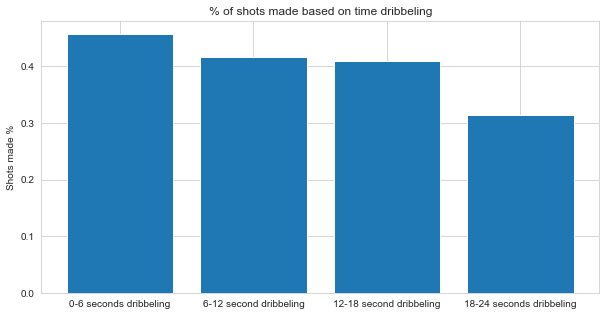

In [93]:
short_touch = df.loc[df["TOUCH_TIME"] < 6]
med_touch = df.loc[(df["TOUCH_TIME"] >= 6) & (df["TOUCH_TIME"] < 12)]
long_touch = df.loc[(df["TOUCH_TIME"] >= 12) & (df["TOUCH_TIME"] < 18)]
super_long_touch = df.loc[(df["TOUCH_TIME"] >= 18) & (df["TOUCH_TIME"] < 24)]
short_per = short_touch.loc[short_touch["SHOT_RESULT"] == 1].shape[0]/short_touch.shape[0]
med_per = med_touch.loc[med_touch["SHOT_RESULT"] == 1].shape[0]/med_touch.shape[0]
long_per = long_touch.loc[long_touch["SHOT_RESULT"] == 1].shape[0]/long_touch.shape[0]
sLong_per = super_long_touch.loc[super_long_touch["SHOT_RESULT"] == 1].shape[0]/super_long_touch.shape[0]
per = [short_per,med_per,long_per,sLong_per ]
xlabels =["0-6 seconds dribbeling","6-12 second dribbeling","12-18 second dribbeling","18-24 seconds dribbeling"]
plt.figure(figsize = [10,5])
plt.bar(x = xlabels,height = per)
plt.ylabel("Shots made %")
plt.title("% of shots made based on time dribbeling")

as we see the longer the player is dribbeling, his % of making his shot drops, but we will see how much we have of each category to wee if we can remove the outliers

In [95]:
print(short_per)
print(short_touch.shape[0])
print(med_per)
print(med_touch.shape[0])
print(long_per)
print(long_touch.shape[0])
print(sLong_per)
print(super_long_touch.shape[0])

0.4572611025627421
113082
0.4170769106609636
12391
0.40960743801652894
1936
0.3137254901960784
153


as we see we only have 153 shots with more then 18 second of dribbeling, which is 0.1% of our total shots, and beaucse they have a very low precentege, it will also lower the model down, so we will remove those as well

In [96]:
df = df[df["TOUCH_TIME"] < 18]
df

,PERIOD,DRIBBLES,TOUCH_TIME,SHOT_RESULT,quick_possession,late_possesion,medium_possession,slow_possession,close_two,short_two,mid_range_two,long_two,three_pointer
0,1,2,1.9,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,0,0.8,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,3,2.7,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,2,2,1.9,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2,2,2.7,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
128064,3,5,6.2,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
128065,4,4,5.2,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
128066,4,2,4.2,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
128067,4,4,4.5,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [97]:
target = df.SHOT_RESULT
df = df.drop(columns = ["SHOT_RESULT"])
print(target)
print(type(target))
target = target.to_numpy()

0         1
1         0
2         0
3         0
4         0
         ..
128064    0
128065    1
128066    1
128067    0
128068    1
Name: SHOT_RESULT, Length: 127409, dtype: int64
<class 'pandas.core.series.Series'>


now we need to set an array of arrays that will hold our data for each shot and reindex our dataframe cause we dropped some rows

In [108]:
df.reset_index(drop=True, inplace=True)
df

,PERIOD,DRIBBLES,TOUCH_TIME,quick_possession,late_possesion,medium_possession,slow_possession,close_two,short_two,mid_range_two,long_two,three_pointer
0,1,2,1.9,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,0,0.8,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,3,2.7,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,2,2,1.9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2,2,2.7,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
127404,3,5,6.2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
127405,4,4,5.2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
127406,4,2,4.2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
127407,4,4,4.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


PERIOD               2.0
DRIBBLES             0.0
TOUCH_TIME           0.8
quick_possession     1.0
late_possesion       0.0
medium_possession    0.0
slow_possession      0.0
close_two            0.0
short_two            0.0
mid_range_two        0.0
long_two             1.0
three_pointer        0.0
Name: 338, dtype: float64

In [111]:
data = np.zeros((df.shape[0],12))
for i in range(len(data)):
    data[i][0] = df.loc[i].PERIOD
    data[i][1] = df.loc[i].DRIBBLES
    data[i][2] = df.loc[i].TOUCH_TIME
    data[i][3] = df.loc[i].quick_possession
    data[i][4] = df.loc[i].late_possesion
    data[i][5] = df.loc[i].medium_possession
    data[i][6] = df.loc[i].slow_possession
    data[i][7] = df.loc[i].close_two
    data[i][8] = df.loc[i].short_two
    data[i][9] = df.loc[i].mid_range_two
    data[i][10] = df.loc[i].long_two
    data[i][11] = df.loc[i].three_pointer
    

In [112]:
data[0]

array([1. , 2. , 1.9, 0. , 0. , 1. , 0. , 0. , 1. , 0. , 0. , 0. ])

In [113]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

after we worked on the data, its time to start splitting it and using sklearn models on it,first we will run on a loop to check for the most optimal n in knn model, and since we have a lot of sampels, we will check between 10 and 100.

In [42]:
data_train, data_test, target_train, target_test = train_test_split(data, target,test_size = 0.05, random_state=10)

knn = KNeighborsClassifier(n_neighbors=100)
knn.fit(data_train, target_train)
pred = knn.predict(data_test)
print(metrics.accuracy_score(target_test , pred))
scores = cross_val_score(knn, data, target, cv=10, scoring='accuracy')
print(scores)

0.6174266083697689
[0.61505427 0.6135707  0.610057   0.61021316 0.6052159  0.61286796
 0.60677754 0.59998438 0.60677754 0.60409183]


In [43]:
print('True:', target_test[0:50])
print('Pred:', pred[0:50])
confusion = metrics.confusion_matrix(target_test, pred)
print(confusion)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print(TP)
print(TN)
print(FP)
print(FN)

True: [0 0 0 1 0 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 0 0 0 1 0 1 0 0 1 0 0
 0 1 1 0 1 0 0 0 0 1 1 0 0]
Pred: [0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 1 0 0]
[[2920  624]
 [1826 1034]]
1034
2920
624
1826


In [96]:
print(metrics.precision_score(target_test, pred))

0.6241569589209074
